In [ ]:
!pip install plot-metric
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
# card_data = pd.read_csv('creditcard.csv',sep=None)
card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
card_data.shape

(284807, 31)

# **Data Preprocessing**

In [ ]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# As all the columns are in float data type there is no need to change their data types.

### **Checking null values**

In [ ]:
(card_data.isnull().sum() * 100 / len(card_data)).sort_values(ascending=False)

# card_data.isnull().sum()

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [ ]:
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **Checking duplicate records**

In [ ]:
duplicate = card_data[card_data.duplicated()]

In [ ]:

duplicate

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [ ]:
# card_data1 = card_data.drop_duplicates()

### **Checking data imbalance**

In [ ]:
target_lbl = {0:'Normal Transactions', 1:'Fraud Transaction'}
print(card_data.Class.value_counts().rename(index = target_lbl))

Normal Transactions    284315
Fraud Transaction         492
Name: Class, dtype: int64


In [ ]:
# The data is highly imbalanced as out of 284807 only 492 records have been detected as fraud agaist 284315 non-fraud transactions.
# Therefore the data has to be balanced before training the model.

Text(0, 0.5, 'Count')

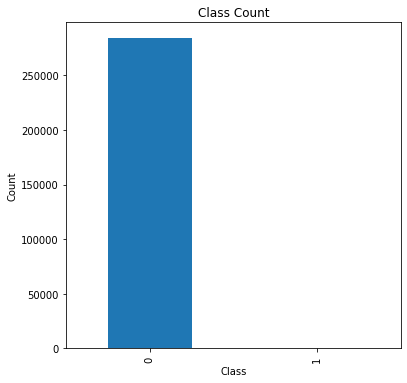

In [ ]:
graph = pd.value_counts(card_data['Class'],sort = True)
plt.figure(figsize = (6,6))
graph.plot(kind = 'bar')
plt.title('Class Count')

plt.xlabel('Class')
plt.ylabel('Count')


<Figure size 432x432 with 0 Axes>

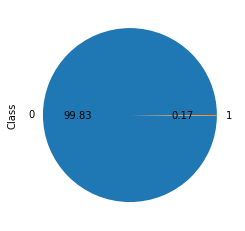

<Figure size 432x432 with 0 Axes>

In [ ]:
card_data['Class'].value_counts().plot.pie(autopct='%.2f')
plt.figure(figsize = (6,6))

### **Checking Outliers**

In [ ]:
cols_x = card_data.columns
cols_x = cols_x.drop('Class')

In [ ]:
cols_x

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

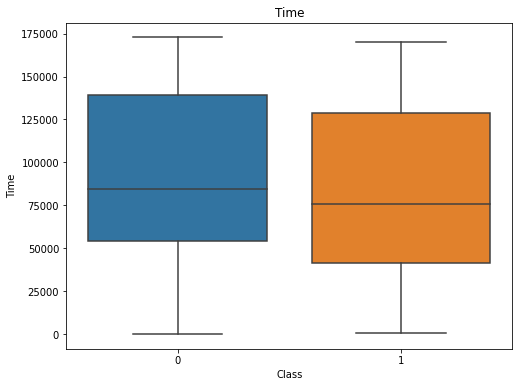

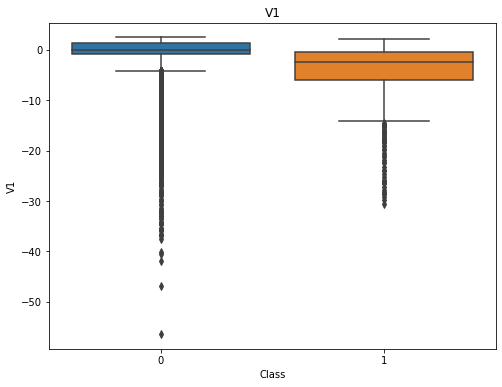

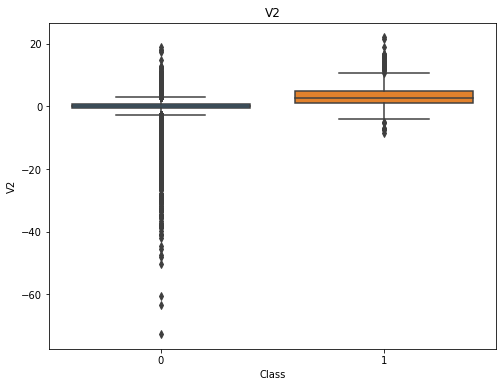

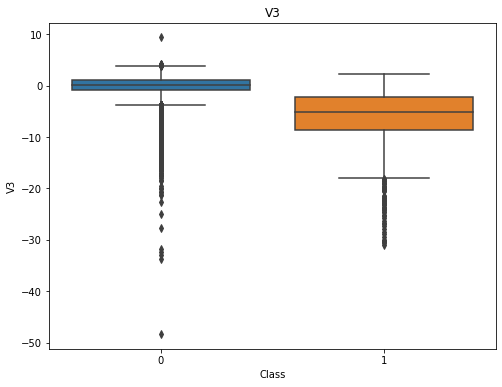

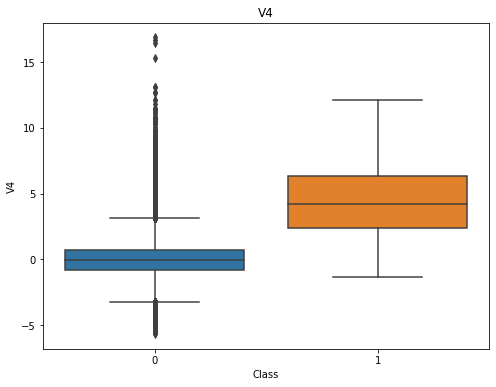

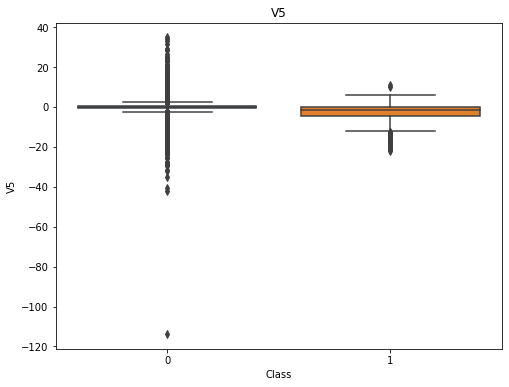

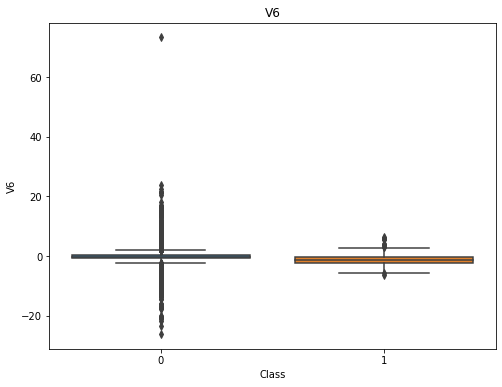

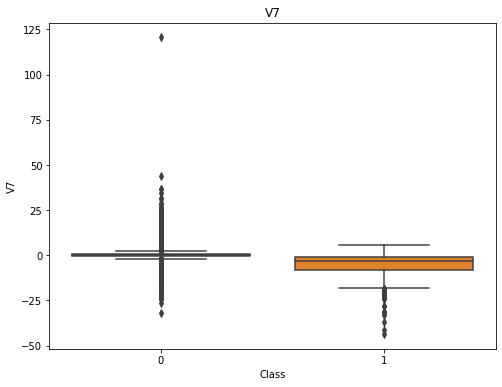

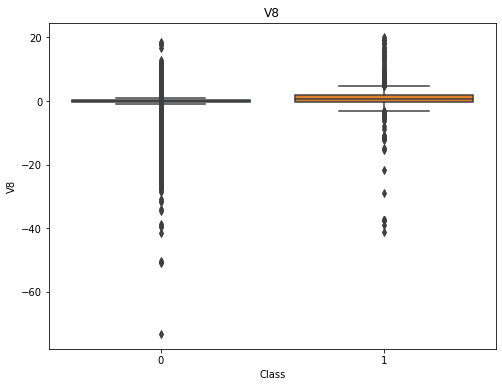

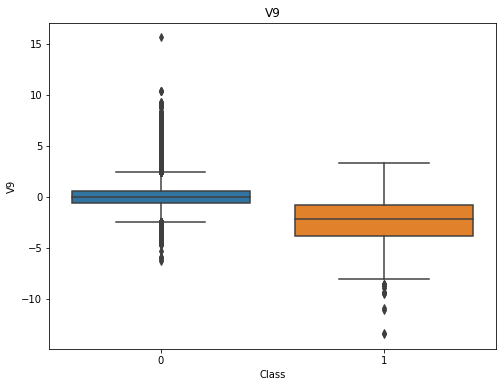

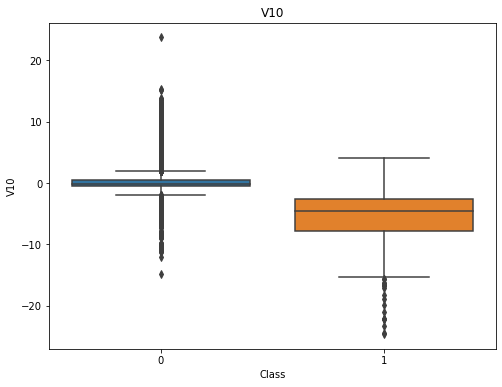

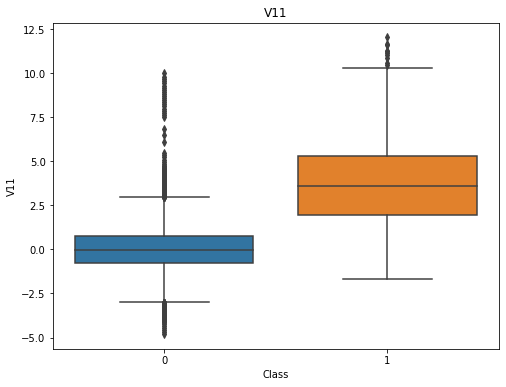

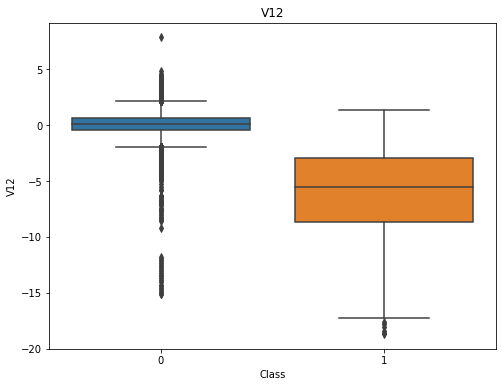

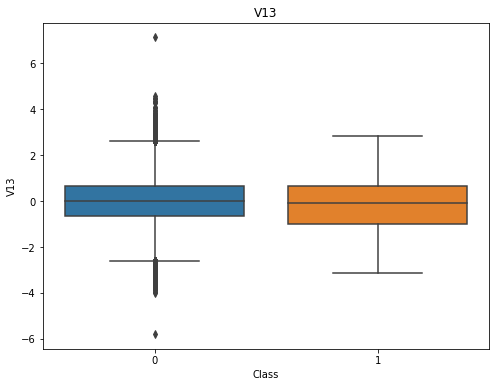

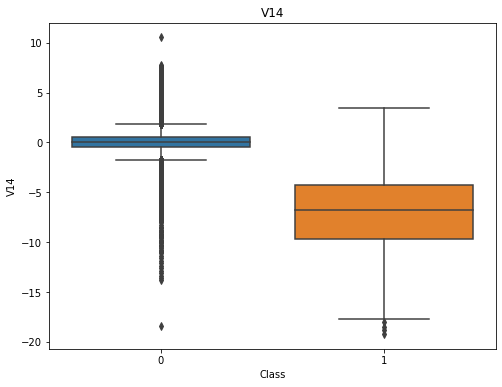

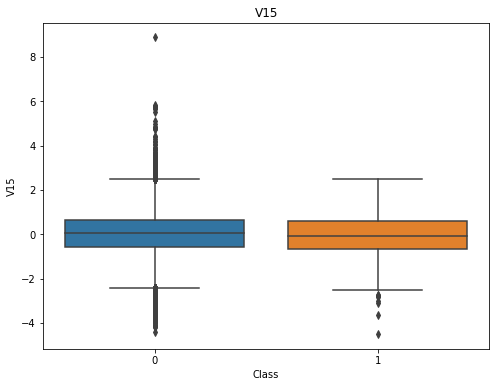

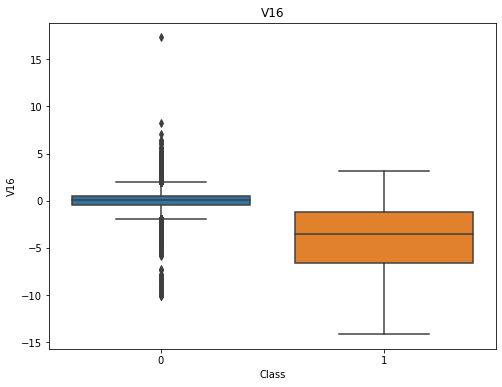

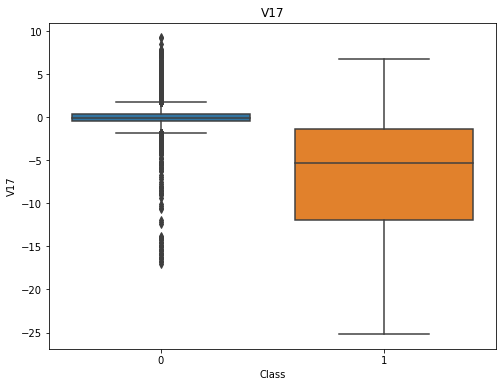

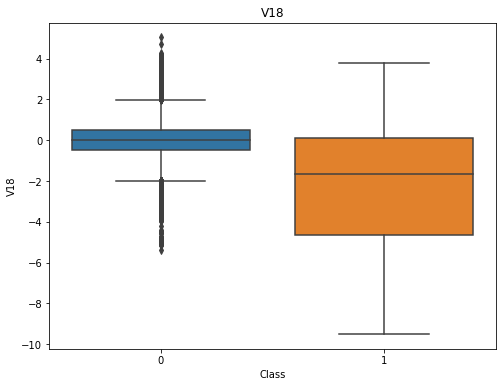

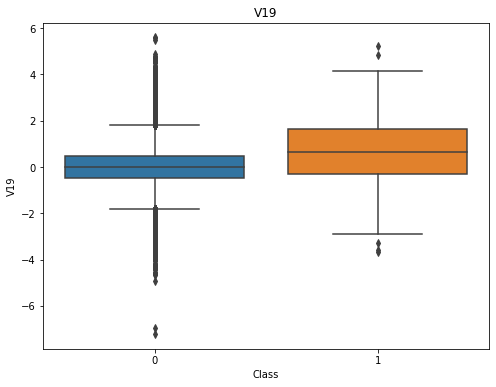

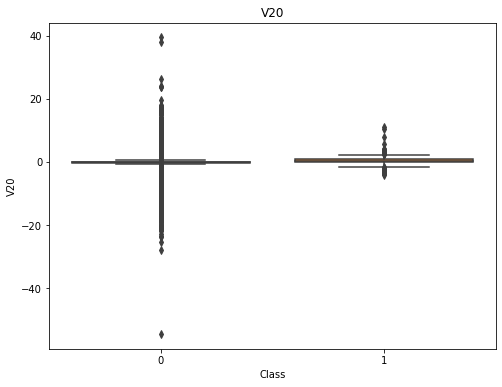

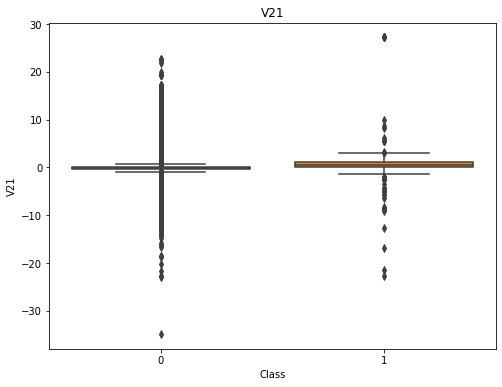

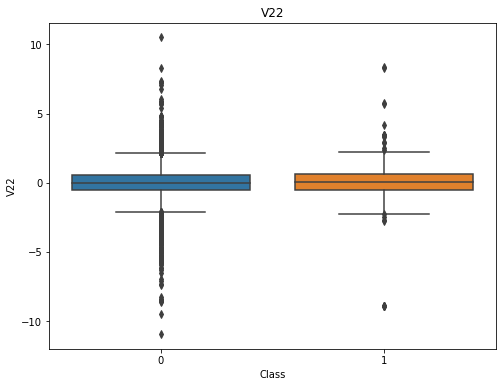

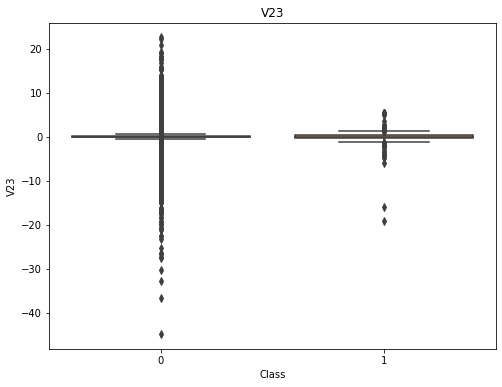

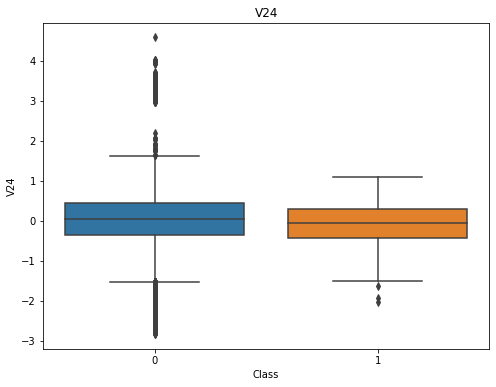

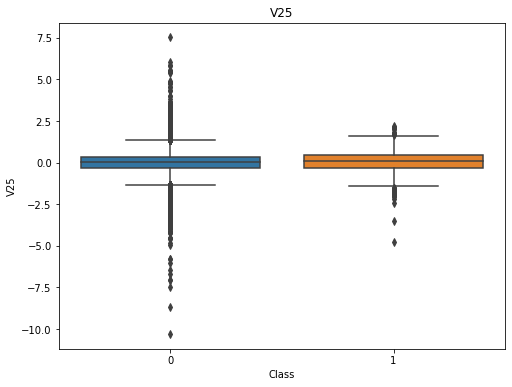

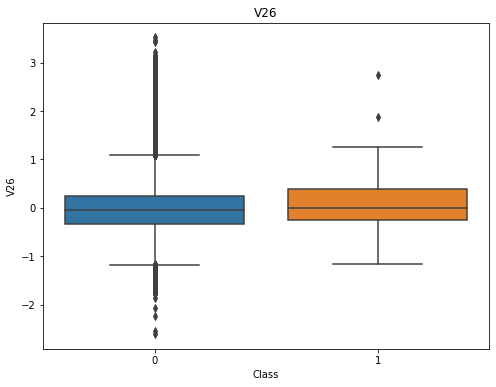

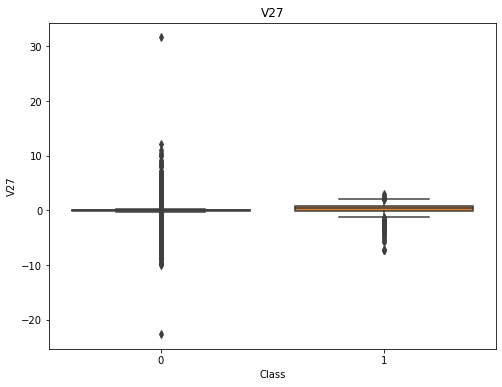

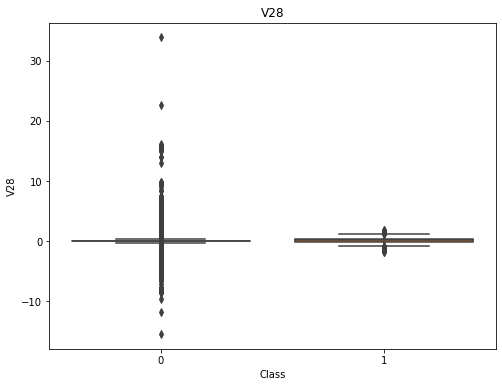

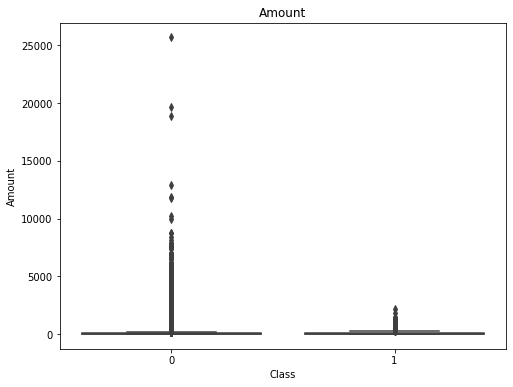

In [ ]:
for col in cols_x:
  plt.figure(figsize = (8, 6))
  sns.boxplot(x = card_data['Class'] , y = col , data = card_data)
  plt.title(col)
  plt.show()
  print('\n\n')


In [ ]:
# Function for outlier detection

def outliers(col_s):
  quantile_1 = card_data[col_s].quantile(0.10)
  quantile_3 = card_data[col_s].quantile(0.90)
  inter_QR = quantile_3-quantile_1
  lwr_bound = quantile_1 - 1.5*inter_QR
  upr_bound = quantile_3 + 1.5*inter_QR

  return lwr_bound , upr_bound

In [ ]:
# Trimming outliers
for feat in cols_x:
  # if ((card_data1[feat].dtype == 'float') | (card_data1[feat].dtype == 'int')):
    lwr_bound, upr_bound = outliers(feat)
    card_data1 = card_data[(card_data[feat] > lwr_bound ) & (card_data[feat] < upr_bound)]

In [ ]:
card_data1.shape

(275791, 31)

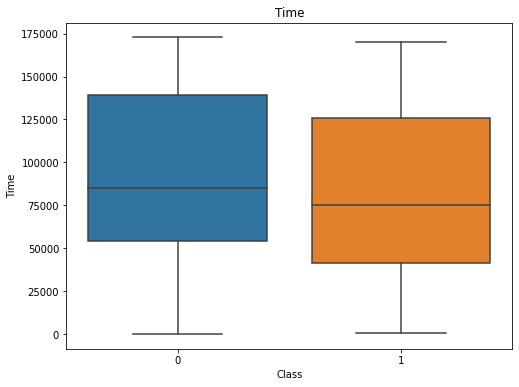

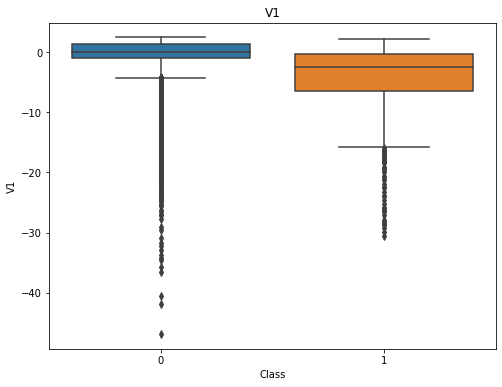

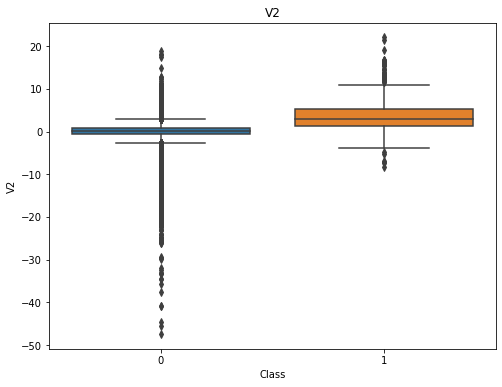

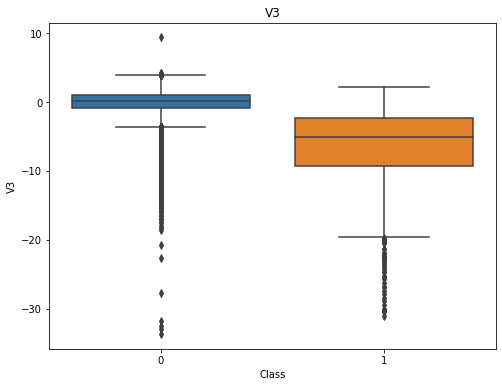

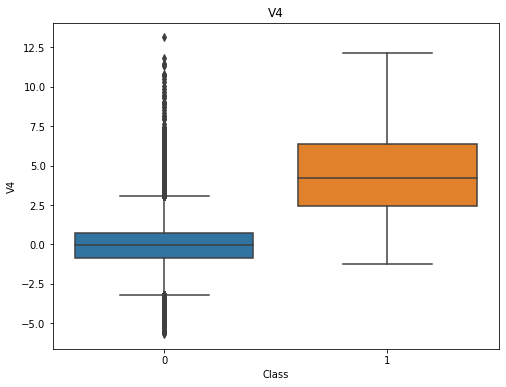

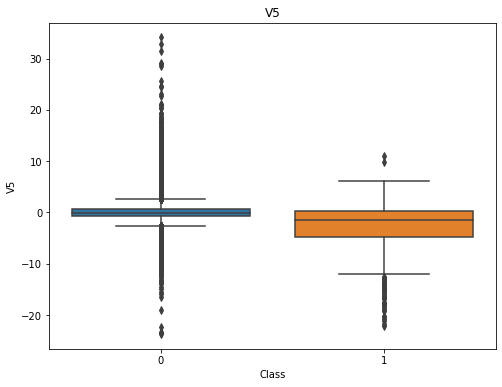

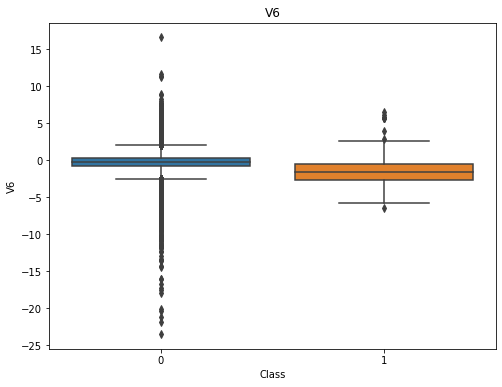

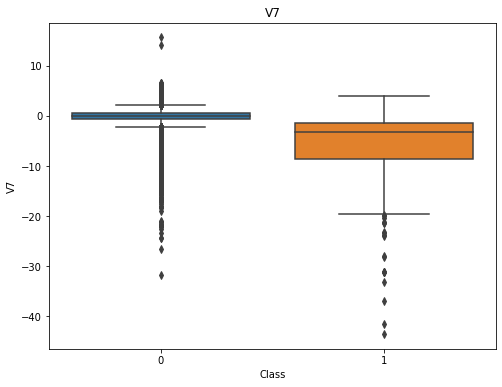

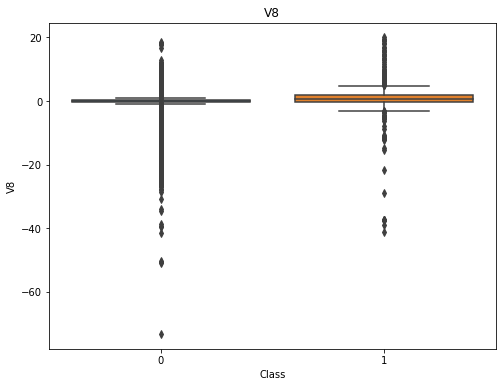

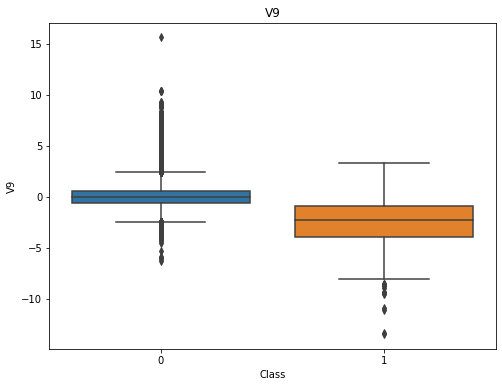

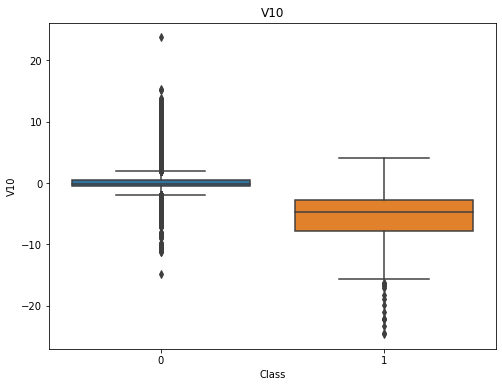

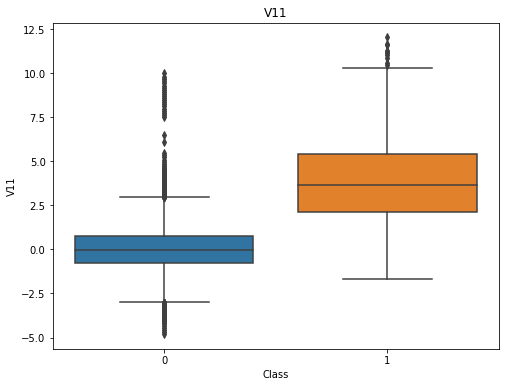

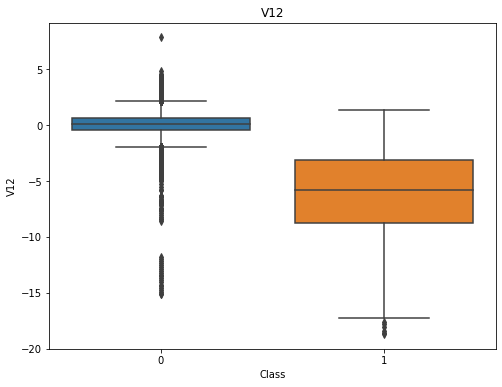

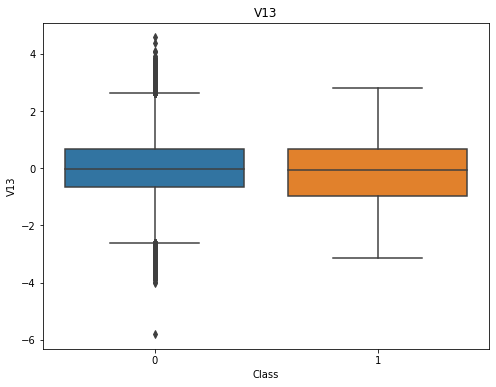

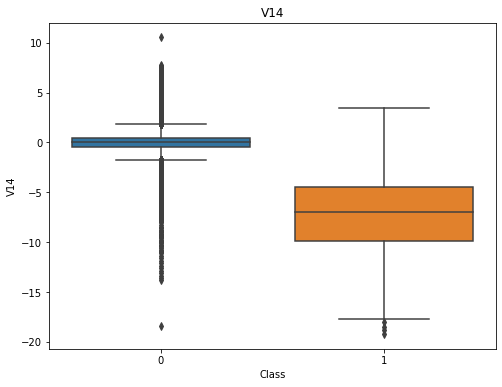

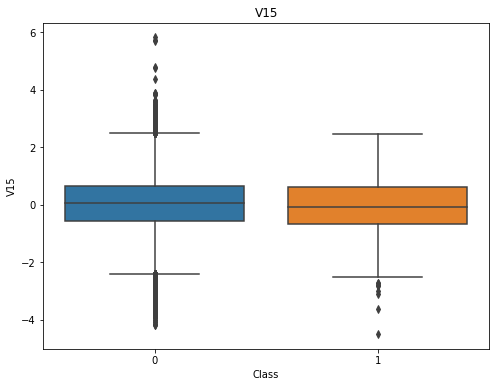

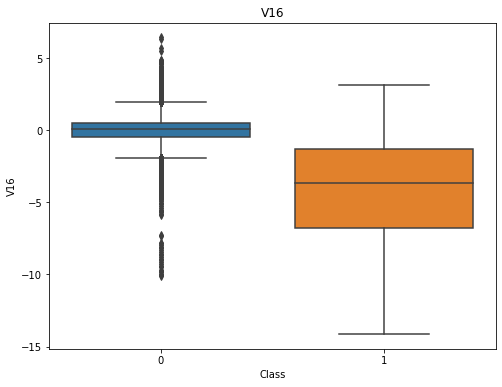

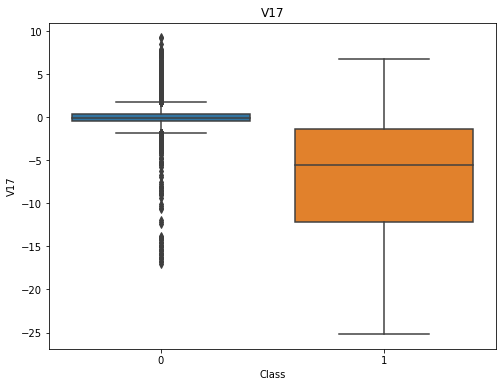

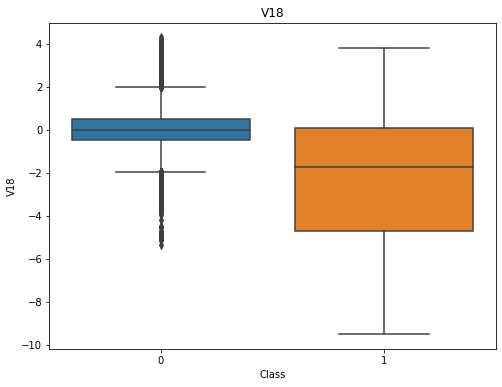

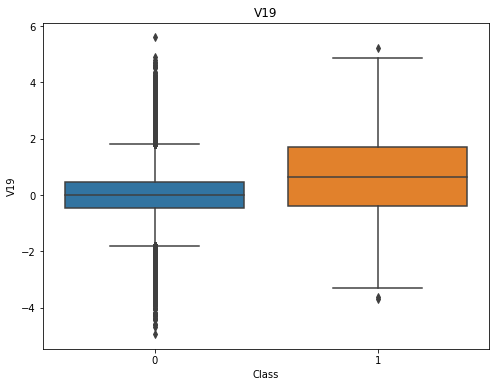

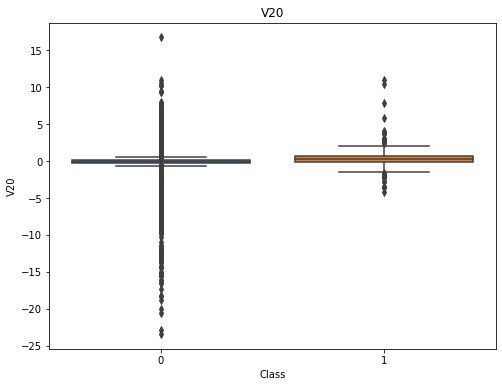

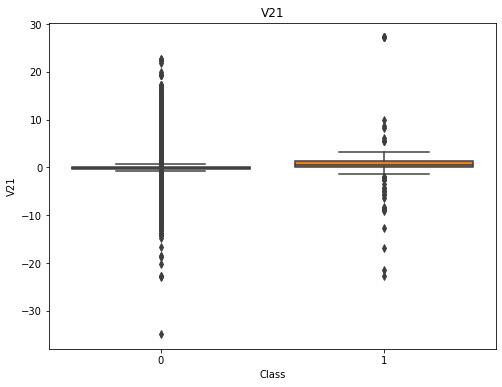

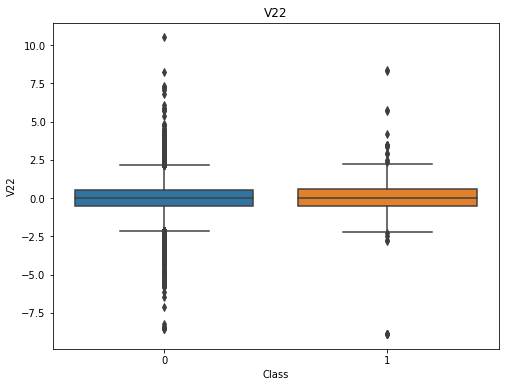

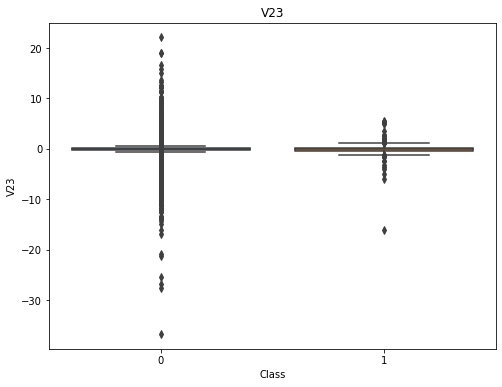

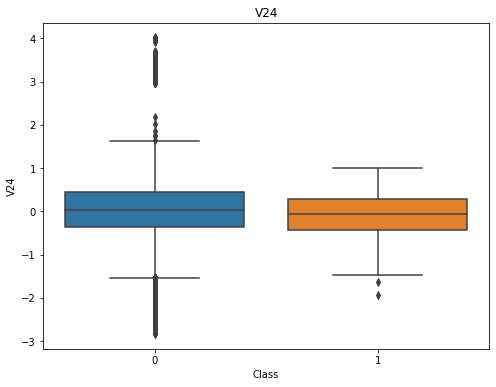

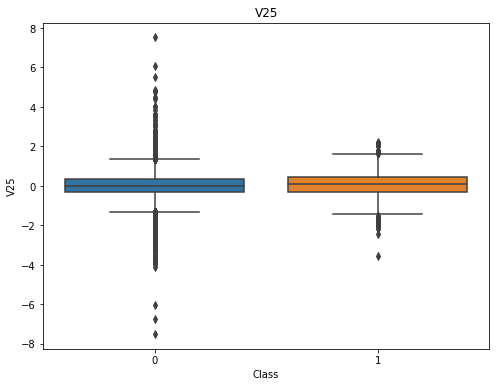

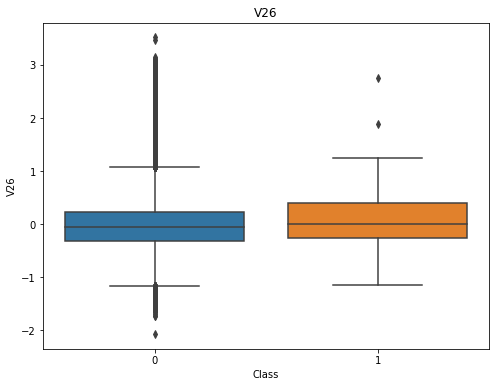

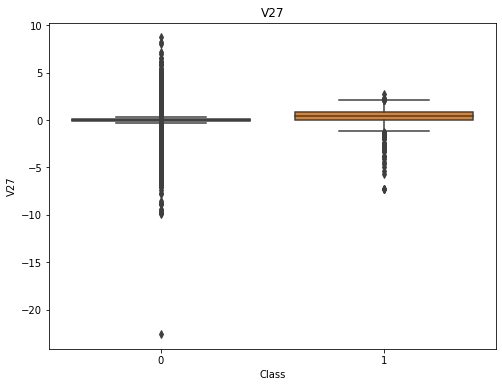

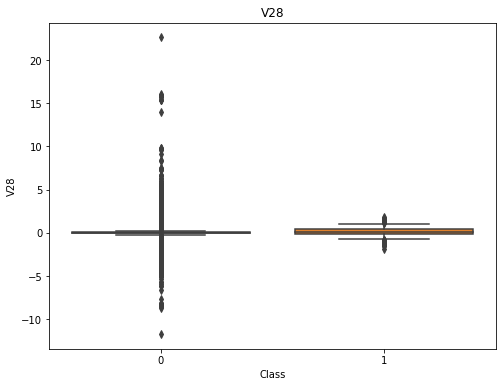

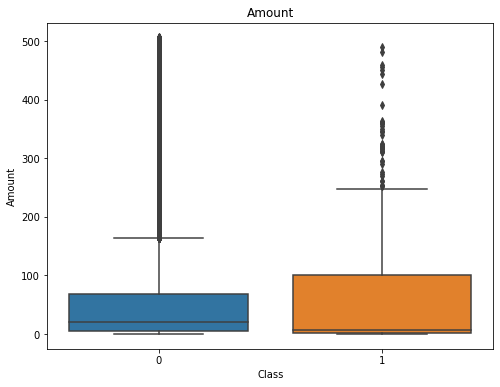

In [ ]:
for col in cols_x:
  plt.figure(figsize = (8, 6))
  sns.boxplot(x = card_data1['Class'] , y = col , data = card_data1)
  plt.title(col)
  plt.show()
  print('\n\n')

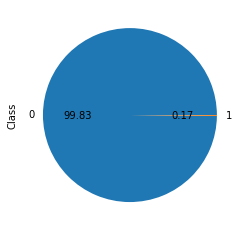

In [ ]:
card_data1['Class'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
#  In the above pie chare the percentage of fraud transactions decreased from 0.17 % to 0.16 % as the records of fraud transactions got eliminated when the outliers were trimmed.Still the data is highly imbalanced.

# **Data Analysis**

### **Checking data distribution**

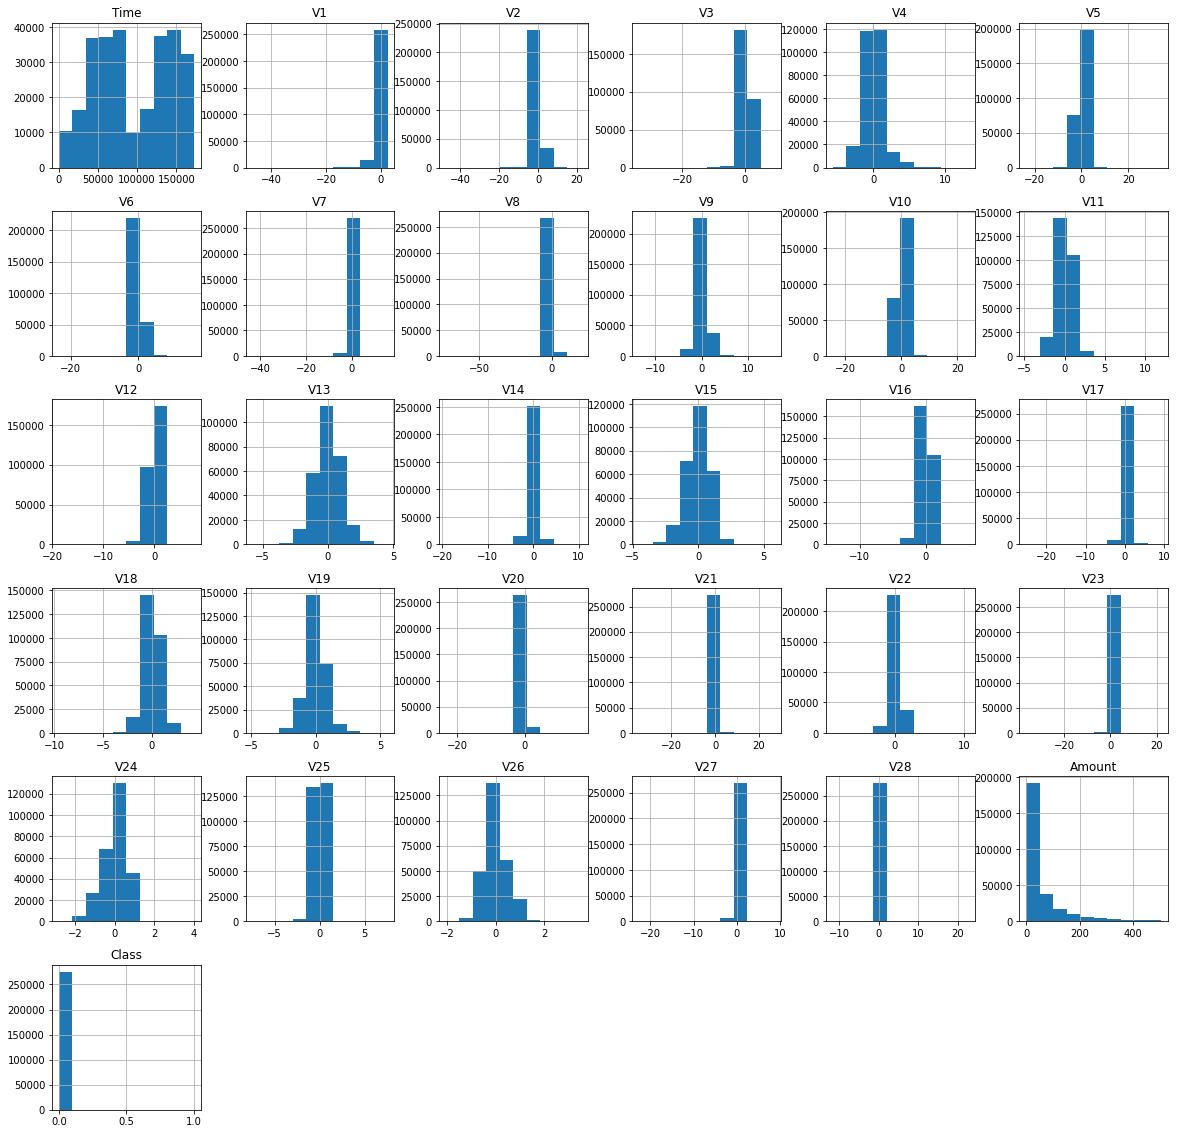

In [ ]:
card_data1.hist(figsize = (20, 20))
plt.show()

### **Relation of features**

<Figure size 576x576 with 0 Axes>

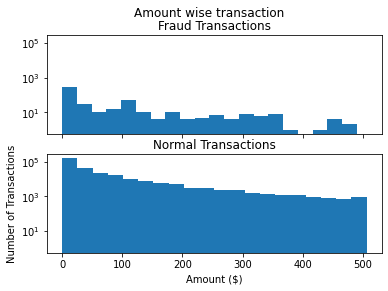

In [ ]:
plt.figure(figsize = (8, 8))
feat, (graph1, graph2) = plt.subplots(2, 1, sharex=True, sharey=True)
feat.suptitle('Amount wise transaction')
graph1.hist(card_data1[card_data1['Class']==1].Amount,bins=20)
graph1.set_title('Fraud Transactions')
graph2.hist(card_data1[card_data1['Class']==0].Amount,bins=20)
graph2.set_title('Normal Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.rcParams["figure.figsize"] = (20,6)
plt.show();

In [ ]:
# From the above graph it is clear that for the normal transcations majority of the transactions took place for smaller money amount. Whereas fraud transactions took place when the amount transaction was less.

### **Feature Correlation**

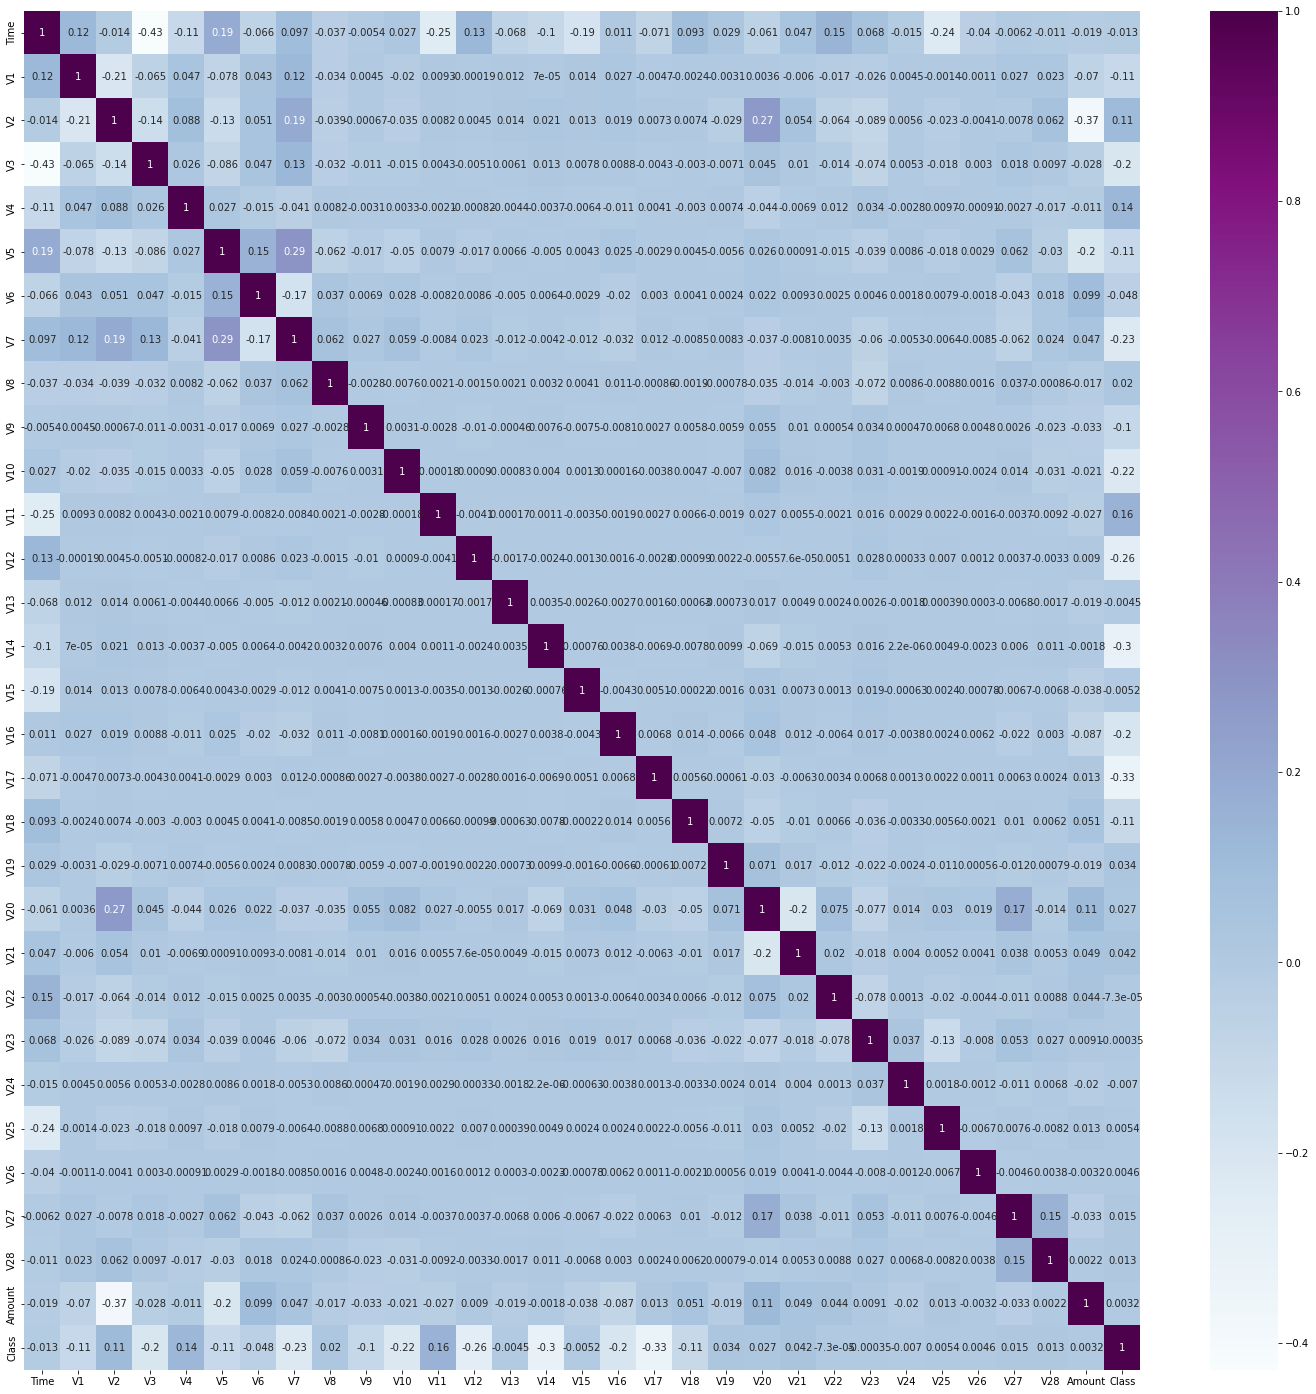

In [ ]:
# feature correlation

plt.figure(figsize = (25, 25))
cor=card_data1.corr()
sns.heatmap(cor, annot = True, cmap="BuPu")
plt.show()

In [ ]:
card_data1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### **Feature Selection**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = card_data1.drop('Class',axis=1)
y = card_data1['Class']

mutual_info = mutual_info_classif(X,y)

In [ ]:
ms = pd.Series(mutual_info,index = X.columns)
ms.sort_values(ascending = False , inplace = True)

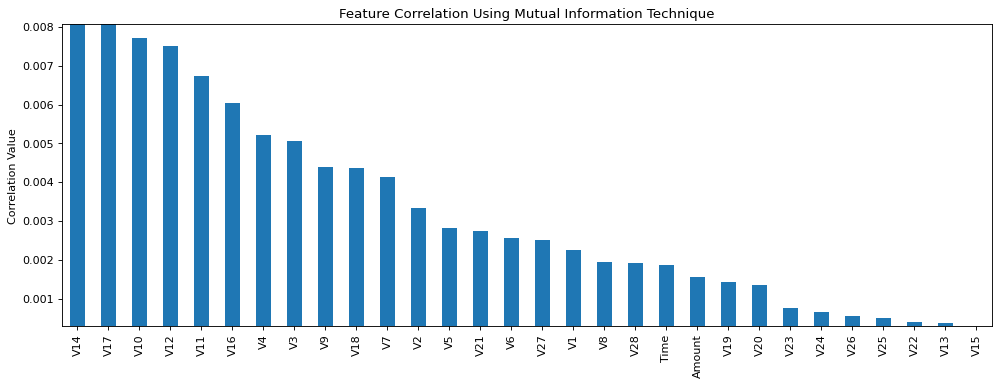

In [ ]:
plt.figure(figsize=(15, 5), dpi=80)
plt.ylim(mutual_info.min(),mutual_info.max())
plt.title('Feature Correlation Using Mutual Information Technique')
plt.ylabel('Correlation Value')
# plt.yscale('log')
ms.plot.bar()

In [ ]:
# features_drop = ['V8','V28','Time','V28','Amount','V19','V20','V23','V24','V26','V25','V22','V13','V15']

card_data1 = card_data1.drop(columns = ['V8','V28','Time','V28','Amount','V19','V20','V23','V24','V26','V25','V22','V13','V15'], axis=1)

In [ ]:
card_data1.shape

(275791, 18)

### **Standardizing the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

#  As the value of few columns are on different scale caomapred to other colmns. Therefore, all the features are scaled by using standard scalar function.
# splitting data for training and testing purpose


X = card_data1.drop('Class',axis=1)
y = card_data1['Class']
# scalar = StandardScaler()
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns, index=X.index)

# card_data1 = scalar.fit_transform(card_data1)

In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V21,V27
0,-0.761090,-0.135251,1.691555,0.998511,-0.323894,0.388720,0.283738,0.327525,0.070861,-0.540381,-0.618279,-0.318851,-0.544828,0.246695,0.033162,-0.010236,0.353488
1,0.608871,0.109681,0.083676,0.333648,-0.002171,-0.038972,-0.016839,-0.239532,-0.167152,1.581560,1.064684,-0.144330,0.533495,-0.133012,-0.218575,-0.301273,-0.023573
2,-0.760310,-1.051136,1.173791,0.284767,-0.457059,1.439296,0.804706,-1.392700,0.178755,0.612688,0.065576,-0.167447,-3.337454,1.307790,-0.143949,0.363339,-0.146233
3,-0.549805,-0.216510,1.187213,-0.603912,-0.058971,1.004893,0.281860,-1.275820,-0.063715,-0.221636,0.177715,-0.294616,-1.224895,-0.802713,2.368139,-0.136479,0.166109
4,-0.652867,0.551649,1.021480,0.301391,-0.379520,0.101001,0.617299,0.743243,0.682385,-0.806312,0.537667,-1.161763,-0.522956,-0.276800,-0.043851,0.002216,0.580621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-6.409871,7.195809,-6.701861,-1.464204,-4.383331,-2.020985,-4.585334,1.747560,4.009340,-1.561490,2.711317,4.829435,1.276435,2.345032,0.616720,0.314880,2.496403
284803,-0.424451,-0.122459,1.351427,-0.514761,0.650592,0.856672,0.080520,0.529923,-0.914106,-0.146831,0.915257,-0.698316,-0.823385,-0.028183,-1.467698,0.315934,0.181318
284804,0.999570,-0.300359,-2.234052,-0.385535,2.073925,2.405589,-0.222657,0.390409,-0.460603,0.403969,0.062611,-0.526772,0.160479,0.370840,0.478330,0.340959,0.011974
284805,-0.160114,0.300703,0.447355,0.506401,-0.355910,0.515376,-0.590214,0.353441,-0.381511,-1.895560,-0.963349,0.474323,-0.704302,0.601913,1.342914,0.387532,0.288050


## **Balancing the data**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

print('The imbalanced data is \n',y_train.value_counts())

The imbalanced data is 
 0    220265
1       367
Name: Class, dtype: int64


In [ ]:
# splitting and balancing data using SMOTE(Synthetic Miority Over-sampling Technique) balancing technique

s_mote = SMOTE(random_state = 20)
X_smote, y_smote = s_mote.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.20,random_state=55)

print('The balanced data is \n',y_train_smote.value_counts())

The balanced data is 
 0    220397
1    220137
Name: Class, dtype: int64


In [ ]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(440534, 17)
(440534,)


In [ ]:
# splitting and balancing data using Borderline SMOTE balancing technique

b_smote = BorderlineSMOTE(random_state = 20)
X_bsmote, y_bsmote = b_smote.fit_resample(X, y)
X_train_bsmote, X_test_bsmote, y_train_bsmote, y_test_bsmote = train_test_split(X_bsmote, y_bsmote, test_size=0.20,random_state=55)

print('The balanced data is \n',y_train_bsmote.value_counts())

The balanced data is 
 0    220397
1    220137
Name: Class, dtype: int64


# **Building Model**

### **XgBoost Classifier**

In [ ]:
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 55)

In [ ]:
# Training model using unbalanced data

xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('The accuracy of Unbalanced data is: ',acc)

The accuracy of Unbalanced data is:  0.999492376584057


Classification Report for XGBoost with imbalanced data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55069
           1       0.91      0.77      0.83        90

    accuracy                           1.00     55159
   macro avg       0.95      0.88      0.92     55159
weighted avg       1.00      1.00      1.00     55159



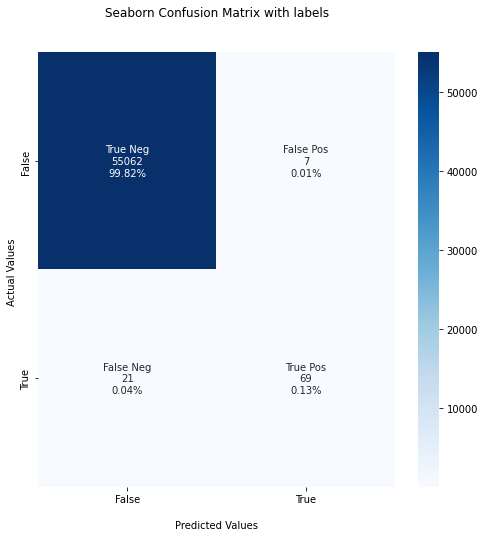

ROC AUC is 0.883


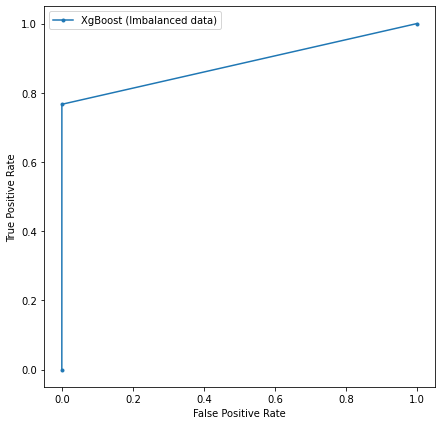

In [ ]:
# Printing classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Classification Report for XGBoost with imbalanced data :\n', classification_report(y_test , y_pred))

# Printing confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (8, 8))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


# getting ROC AUC value
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC is %.3f' % roc_auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, marker='.', label='XgBoost (Imbalanced data)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
# show the plot
plt.show()

# **========================================================**

In [ ]:
# Training model using SMOTE balanced data

xgb.fit(X_train_smote, y_train_smote)
y_pred=xgb.predict(X_test_smote)
acc = accuracy_score(y_test_smote, y_pred)
print('The accuracy of SMOTE balanced data is : ',acc)

The accuracy of SMOTE balanced data is :  0.9761744783627218


Classification Report for XGBoost using SMOTE is :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     54937
           1       0.99      0.97      0.98     55197

    accuracy                           0.98    110134
   macro avg       0.98      0.98      0.98    110134
weighted avg       0.98      0.98      0.98    110134



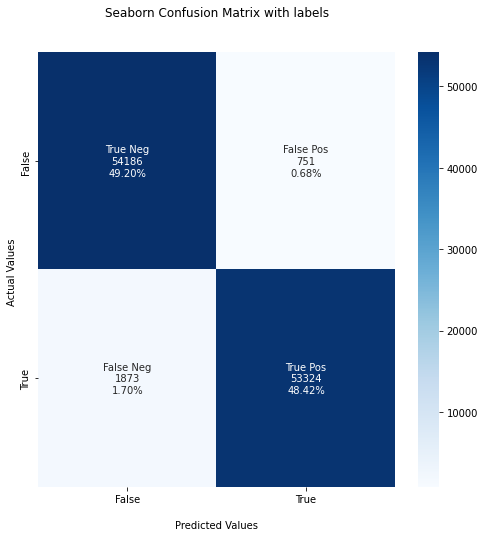

ROC AUC is 0.976


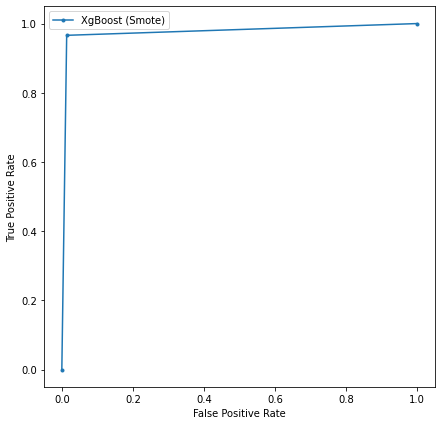

In [ ]:
# Printing classification report
print('Classification Report for XGBoost using SMOTE is :\n', classification_report(y_test_smote , y_pred))

# Printing confusion matrix
cf_matrix = confusion_matrix(y_test_smote, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (8, 8))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


# getting ROC AUC value
roc_auc = roc_auc_score(y_test_smote, y_pred)
print('ROC AUC is %.3f' % roc_auc)

fpr, tpr, _ = metrics.roc_curve(y_test_smote, y_pred)
# plot the roc curve for the model
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, marker='.', label='XgBoost (Smote)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### **========================================================================================**

In [ ]:
# Training model using Borderline SMOTE balanced data

xgb.fit(X_train_bsmote, y_train_bsmote)
y_pred=xgb.predict(X_test_bsmote)
acc = accuracy_score(y_test_bsmote, y_pred)
print('The accuracy over Borderline SMOTE data is : ',acc)

The accuracy over Borderline SMOTE data is :  0.9986652623168141


Classification Report for XGBoost using Borderline SMOTE is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     54937
           1       1.00      1.00      1.00     55197

    accuracy                           1.00    110134
   macro avg       1.00      1.00      1.00    110134
weighted avg       1.00      1.00      1.00    110134



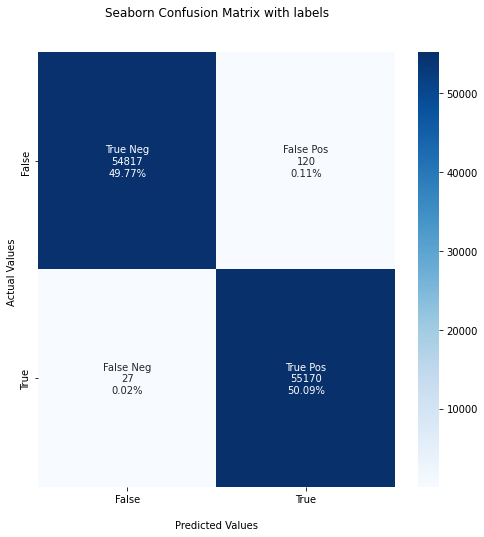

ROC AUC is 0.999


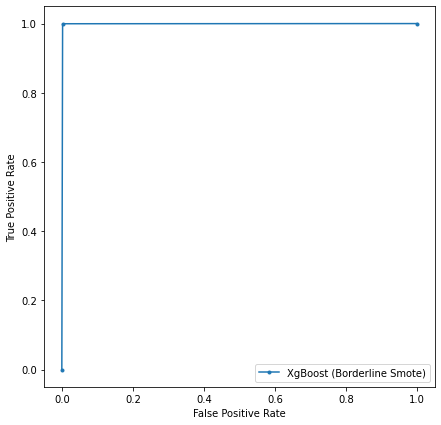

In [ ]:
# Printing classification report
print('Classification Report for XGBoost using Borderline SMOTE is :\n', classification_report(y_test_bsmote , y_pred))


# Printing confusion matrix
cf_matrix = confusion_matrix(y_test_bsmote, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (8, 8))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# getting ROC AUC value
roc_auc = roc_auc_score(y_test_bsmote, y_pred)
print('ROC AUC is %.3f' % roc_auc)

fpr, tpr, _ = metrics.roc_curve(y_test_bsmote, y_pred)
# plot the roc curve for the model
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, marker='.', label='XgBoost (Borderline Smote)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state= 55)

In [ ]:
# Training model using unbalanced data

rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('The accuracy over unbalanced data is : ',acc)

The accuracy over unbalanced data is :  0.9995467648071937


Classification Report for Random forest using unbalanced data is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55069
           1       0.93      0.78      0.85        90

    accuracy                           1.00     55159
   macro avg       0.97      0.89      0.92     55159
weighted avg       1.00      1.00      1.00     55159



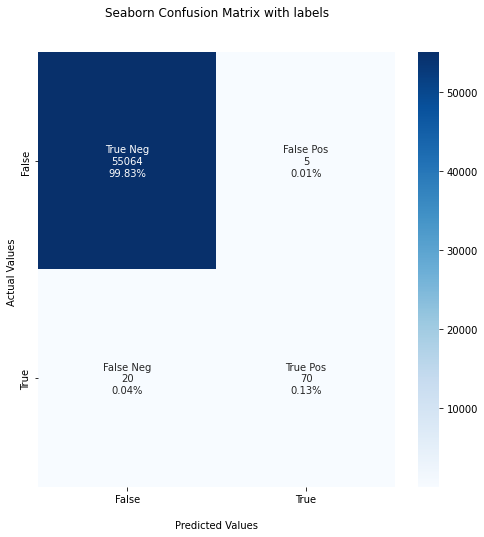

ROC AUC is 0.889


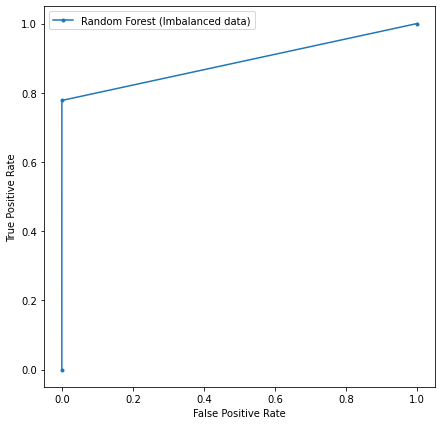

In [ ]:
# Printing classification report
print('Classification Report for Random forest using unbalanced data is :\n', classification_report(y_test , y_pred))


# Printing confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (8, 8))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


# getting ROC AUC value
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC is %.3f' % roc_auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, marker='.', label='Random Forest (Imbalanced data)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### **=================================================================================**

In [ ]:
# Training model using smote balanced data

rfc.fit(X_train_smote, y_train_smote)
y_pred=rfc.predict(X_test_smote)
acc = accuracy_score(y_test_smote, y_pred)
print('The accuracy over SMOTE data is : ',acc)

The accuracy over SMOTE data is :  0.9998819619735958


Classification Report for Random forest using SMOTE balanced data is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     54937
           1       1.00      1.00      1.00     55197

    accuracy                           1.00    110134
   macro avg       1.00      1.00      1.00    110134
weighted avg       1.00      1.00      1.00    110134



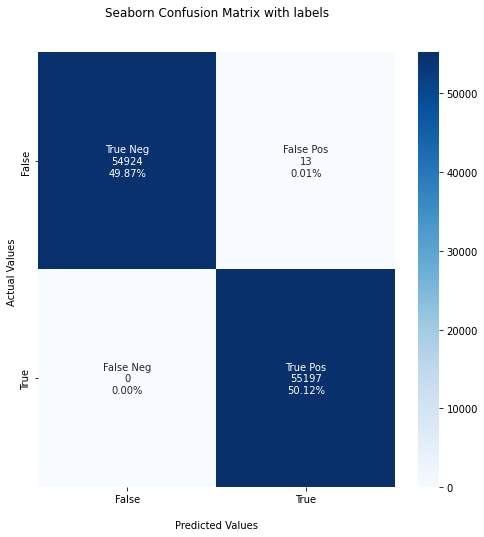

ROC AUC is 1.000


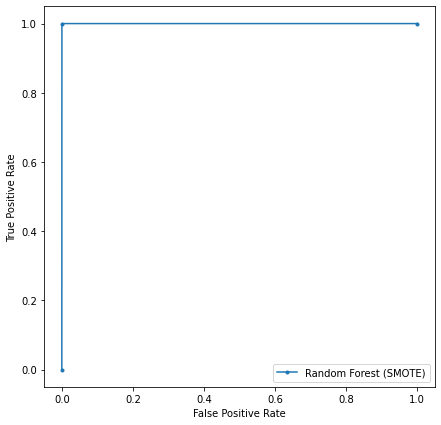

In [ ]:
# Printing classification report
print('Classification Report for Random forest using SMOTE balanced data is :\n', classification_report(y_test_smote , y_pred))


# Printing confusion matrix
cf_matrix = confusion_matrix(y_test_smote, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (8, 8))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# getting ROC AUC value
roc_auc = roc_auc_score(y_test_smote, y_pred)
print('ROC AUC is %.3f' % roc_auc)

fpr, tpr, _ = metrics.roc_curve(y_test_smote, y_pred)
# plot the roc curve for the model
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, marker='.', label='Random Forest (SMOTE)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### **==================================================================================**

In [ ]:
# Training model using Borderline SMOTE balanced data

rfc.fit(X_train_bsmote, y_train_bsmote)
y_pred=rfc.predict(X_test_bsmote)
acc = accuracy_score(y_test_bsmote, y_pred)
print('The accuracy over Borderline SMOTE data is : ',acc)

The accuracy over Borderline SMOTE data is :  0.9998184030363012


Classification Report for Random forest using Borderline SMOTE data is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     54937
           1       1.00      1.00      1.00     55197

    accuracy                           1.00    110134
   macro avg       1.00      1.00      1.00    110134
weighted avg       1.00      1.00      1.00    110134



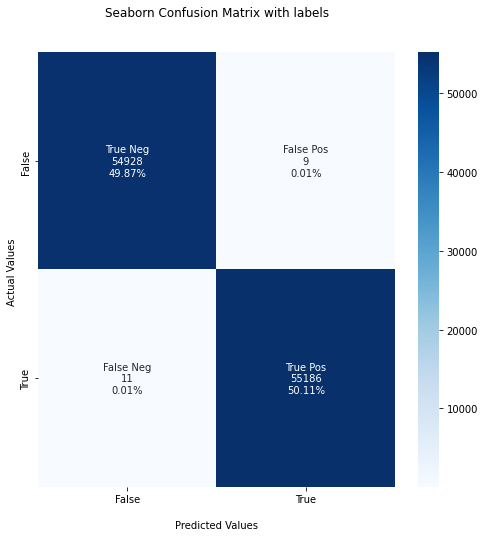

ROC AUC is 1.000


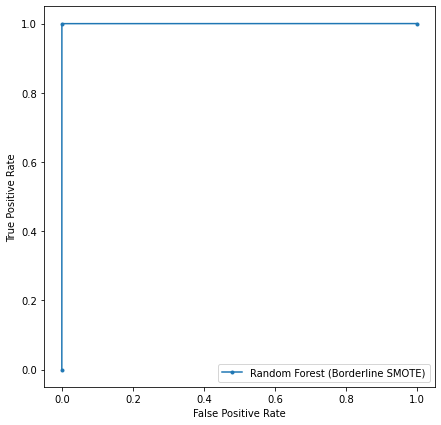

In [ ]:
# Printing classification report
print('Classification Report for Random forest using Borderline SMOTE data is :\n', classification_report(y_test_bsmote , y_pred))


# Printing confusion matrix
cf_matrix = confusion_matrix(y_test_bsmote, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (8, 8))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# getting ROC AUC value
roc_auc = roc_auc_score(y_test_bsmote, y_pred)
print('ROC AUC is %.3f' % roc_auc)

fpr, tpr, _ = metrics.roc_curve(y_test_bsmote, y_pred)
# plot the roc curve for the model
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, marker='.', label='Random Forest (Borderline SMOTE)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,random_state=55)

In [ ]:
# Training model using unbalanced data

lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('The accuracy over unbalanced data is : ',acc)

The accuracy over unbalanced data is :  0.9991479178375242


Classification Report for Logistic Regression using unbalanced data is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55069
           1       0.84      0.59      0.69        90

    accuracy                           1.00     55159
   macro avg       0.92      0.79      0.85     55159
weighted avg       1.00      1.00      1.00     55159



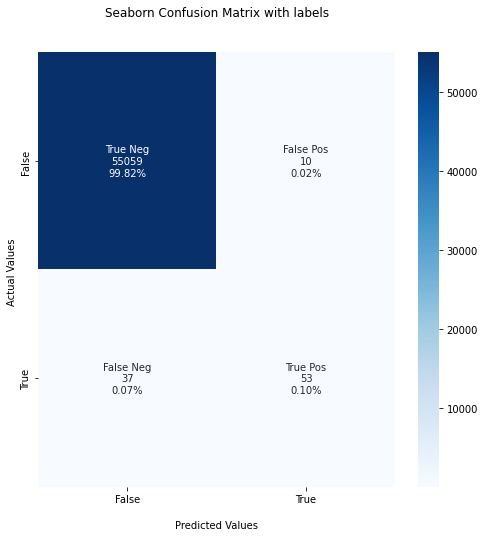

ROC AUC is 0.794


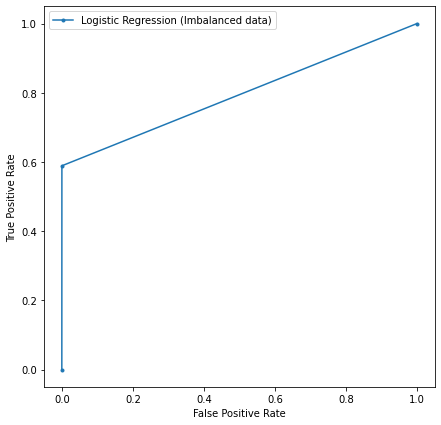

In [ ]:
# Printing classification report
print('Classification Report for Logistic Regression using unbalanced data is :\n', classification_report(y_test, y_pred))


# Printing confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (8, 8))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# getting ROC AUC value
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC is %.3f' % roc_auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (Imbalanced data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# **====================================================================**

In [ ]:
# Training model using SMOTE balanced data

lr.fit(X_train_smote, y_train_smote)
y_pred=lr.predict(X_test_smote)
acc = accuracy_score(y_test_smote, y_pred)
print('The accuracy over SMOTE data is : ',acc)

The accuracy over SMOTE data is :  0.9412079830025242


Classification Report for Logistic Regression using SMOTE balanced data is :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     54937
           1       0.97      0.91      0.94     55197

    accuracy                           0.94    110134
   macro avg       0.94      0.94      0.94    110134
weighted avg       0.94      0.94      0.94    110134



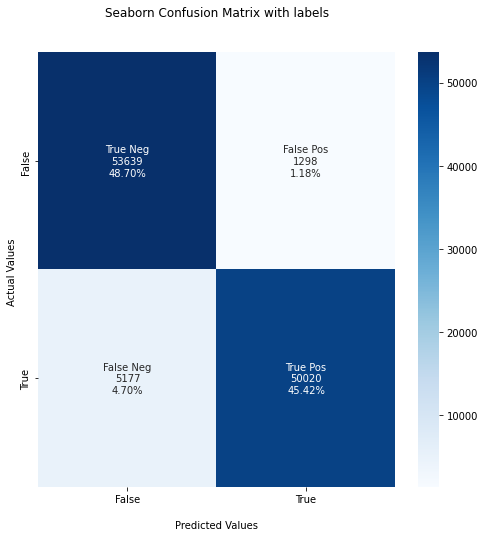

ROC AUC is 0.941


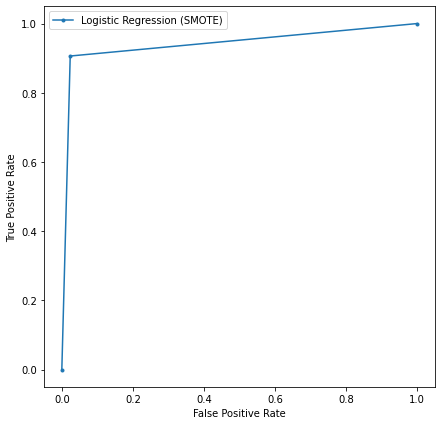

In [ ]:
# Printing classification report
print('Classification Report for Logistic Regression using SMOTE balanced data is :\n', classification_report(y_test_smote, y_pred))


# Printing confusion matrix
cf_matrix = confusion_matrix(y_test_smote, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (8, 8))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# getting ROC AUC value
roc_auc = roc_auc_score(y_test_smote, y_pred)
print('ROC AUC is %.3f' % roc_auc)

fpr, tpr, _ = metrics.roc_curve(y_test_smote, y_pred)
# plot the roc curve for the model
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (SMOTE)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# **====================================================================**

In [ ]:
# Training model using Borderline SMOTE balanced data

lr.fit(X_train_bsmote, y_train_bsmote)
y_pred=lr.predict(X_test_bsmote)
acc = accuracy_score(y_test_bsmote, y_pred)
print('The accuracy over Borderline SMOTE data is : ',acc)

The accuracy over Borderline SMOTE data is :  0.9902119236566365


Classification Report for Logostic Regression using Borderline SMOTE balanced data is :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     54937
           1       0.99      0.99      0.99     55197

    accuracy                           0.99    110134
   macro avg       0.99      0.99      0.99    110134
weighted avg       0.99      0.99      0.99    110134



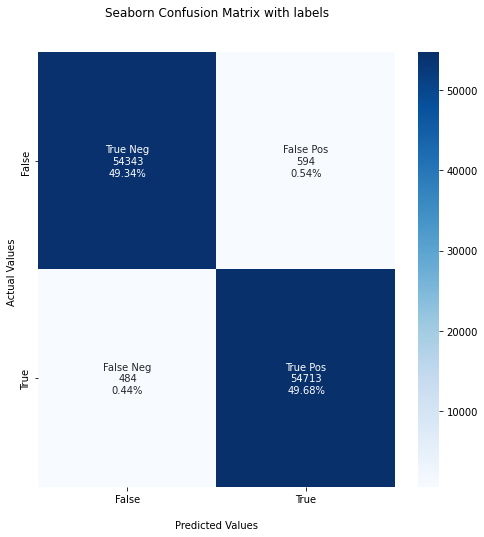

ROC AUC is 0.990


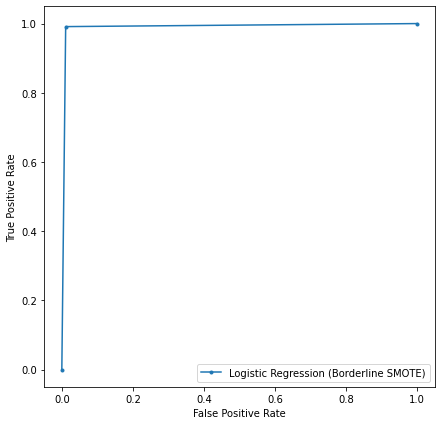

In [ ]:
# Printing classification report
print('Classification Report for Logostic Regression using Borderline SMOTE balanced data is :\n', classification_report(y_test_bsmote, y_pred))


# Printing confusion matrix
cf_matrix = confusion_matrix(y_test_bsmote, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (8, 8))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# getting ROC AUC value
roc_auc = roc_auc_score(y_test_bsmote, y_pred)
print('ROC AUC is %.3f' % roc_auc)

fpr, tpr, _ = metrics.roc_curve(y_test_bsmote, y_pred)
# plot the roc curve for the model
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (Borderline SMOTE)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:

# Training model using unbalanced data

nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('The accuracy over unbalanced data is : ',acc)

The accuracy over unbalanced data is :  0.9840279918055077


Classification Report for SVM using unbalanced data is :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     55069
           1       0.08      0.84      0.15        90

    accuracy                           0.98     55159
   macro avg       0.54      0.91      0.57     55159
weighted avg       1.00      0.98      0.99     55159



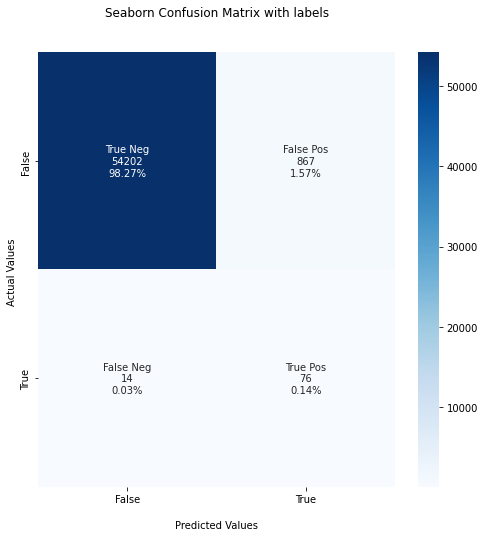

ROC AUC is 0.914


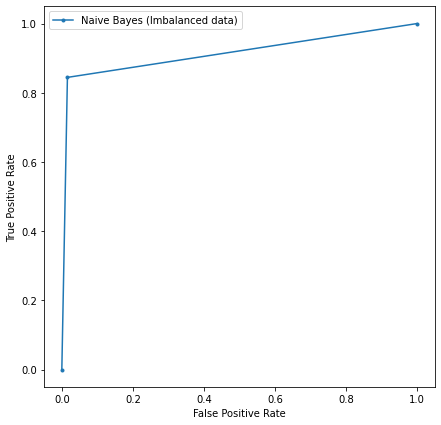

In [ ]:
# Printing classification report
print('Classification Report for SVM using unbalanced data is :\n', classification_report(y_test, y_pred))


# Printing confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (8, 8))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# getting ROC AUC value
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC is %.3f' % roc_auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, marker='.', label='Naive Bayes (Imbalanced data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# **====================================================================**

In [ ]:
# Training model using SMOTE balanced data

nb.fit(X_train_smote, y_train_smote)
y_pred=nb.predict(X_test_smote)
acc = accuracy_score(y_test_smote, y_pred)
print('The accuracy over Borderline SMOTE data is : ',acc)

The accuracy over Borderline SMOTE data is :  0.9248097771805256


Classification Report for GNB using  SMOTE balanced data is :
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     54937
           1       0.98      0.87      0.92     55197

    accuracy                           0.92    110134
   macro avg       0.93      0.92      0.92    110134
weighted avg       0.93      0.92      0.92    110134



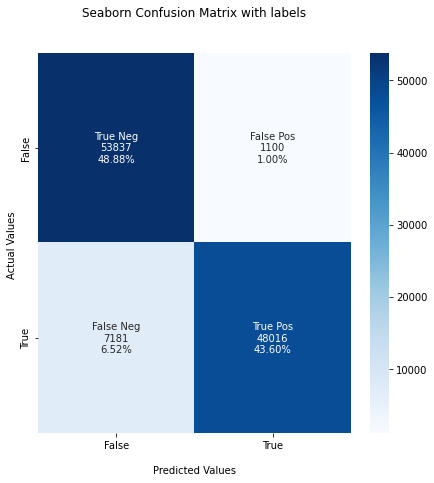

ROC AUC is 0.925


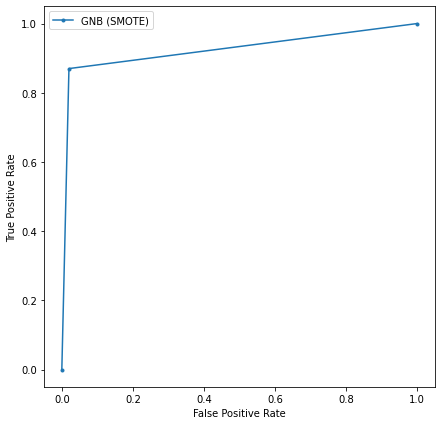

In [ ]:
# Printing classification report
print('Classification Report for GNB using  SMOTE balanced data is :\n', classification_report(y_test_smote, y_pred))


# Printing confusion matrix
cf_matrix = confusion_matrix(y_test_smote, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(7,7))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# getting ROC AUC value
roc_auc = roc_auc_score(y_test_smote, y_pred)
print('ROC AUC is %.3f' % roc_auc)

fpr, tpr, _ = metrics.roc_curve(y_test_smote, y_pred)
# plot the roc curve for the model
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, marker='.', label='GNB (SMOTE)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# **===================================================================**

In [ ]:
# Training model using Borderline SMOTE balanced data

nb.fit(X_train_bsmote, y_train_bsmote)
y_pred=nb.predict(X_test_bsmote)
acc = accuracy_score(y_test_bsmote, y_pred)
print('The accuracy over Borderline SMOTE data is : ',acc)

The accuracy over Borderline SMOTE data is :  0.9083026131803076


Classification Report for GNB using Borderline SMOTE balanced data is :
               precision    recall  f1-score   support

           0       0.86      0.98      0.91     54937
           1       0.98      0.84      0.90     55197

    accuracy                           0.91    110134
   macro avg       0.92      0.91      0.91    110134
weighted avg       0.92      0.91      0.91    110134



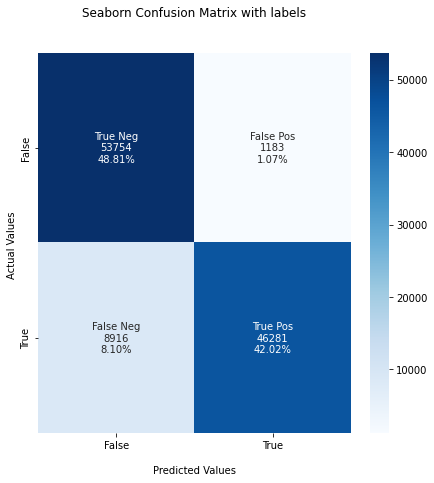

ROC AUC is 0.908


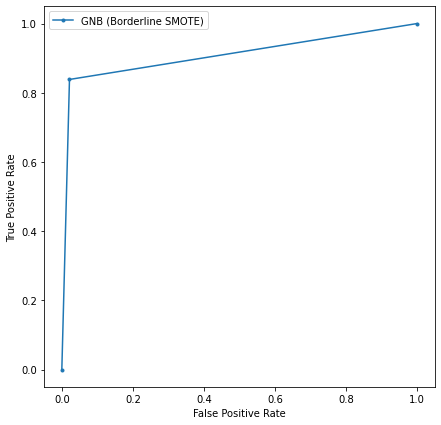

In [ ]:
# Printing classification report
print('Classification Report for GNB using Borderline SMOTE balanced data is :\n', classification_report(y_test_bsmote, y_pred))


# Printing confusion matrix
cf_matrix = confusion_matrix(y_test_bsmote, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(7,7))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# getting ROC AUC value
roc_auc = roc_auc_score(y_test_bsmote, y_pred)
print('ROC AUC is %.3f' % roc_auc)

fpr, tpr, _ = metrics.roc_curve(y_test_bsmote, y_pred)
# plot the roc curve for the model
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, marker='.', label='GNB (Borderline SMOTE)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()